# Correlated shocks

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Vary](#toc2_)    
- 3. [NFA - HANK](#toc3_)    
- 4. [NFA - RANK](#toc4_)    
- 5. [Debt rule](#toc5_)    
- 6. [Solution](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200"

import numpy as np
import pandas as pd
import numba as nb
nb.set_num_threads(4)

import matplotlib.pyplot as plt

import figs
from IHANKModel import HANKModelClass, create_model

In [2]:
DO_T = True

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [3]:
model_HANK = create_model('HANK')

HANK


In [4]:
model_RANK = create_model('RANK',par={'HH_type':'RA-IM'})

RANK


## 2. <a id='toc2_'></a>[Vary](#toc0_)

In [5]:
def vary(basemodel,parname,values,do_create=False):

    models = [basemodel]
    for i,value in enumerate(values):

        try:

            if np.abs(value) < 1e-4:
                print(f'{parname} = {value:5.1e}')
            else:
                print(f'{parname} = {value:5.2f}')

            if do_create:

                model = create_model(f'{parname}_{i}',par={parname:value})

            else:

                model = basemodel.copy()

                if not parname == 'scale':
                    
                    model.par.__dict__[parname] = value
                    model.compute_jacs(skip_shocks=True,skip_hh=True)

                    model.find_transition_path_foreign_shock()

                else:

                    model.find_transition_path_foreign_shock(scale=1/value)

            models.append(model)   

        except Exception as e:
            print(e)

    T_max = max([model.par.T for model in models])
    labels = [model.par.__dict__[parname] for model in models]

    fig = figs.show_IRFs(models,['A','B','C',],labels=labels,T_max=40,legend_window=1)
    fig = figs.show_IRFs(models,['ra','wnT','wnNT','tau'],labels=labels,T_max=40,legend_window=1)
    
    fig = figs.show_IRFs(models,['A','B','C'],labels=labels,T_max=T_max,legend_window=1)
    fig = figs.show_IRFs(models,['ra','wnT','wnNT','tau'],labels=labels,T_max=T_max,legend_window=1)


## 3. <a id='toc3_'></a>[NFA - HANK](#toc0_)

tauNFA = 100.00


tauNFA = 150.00


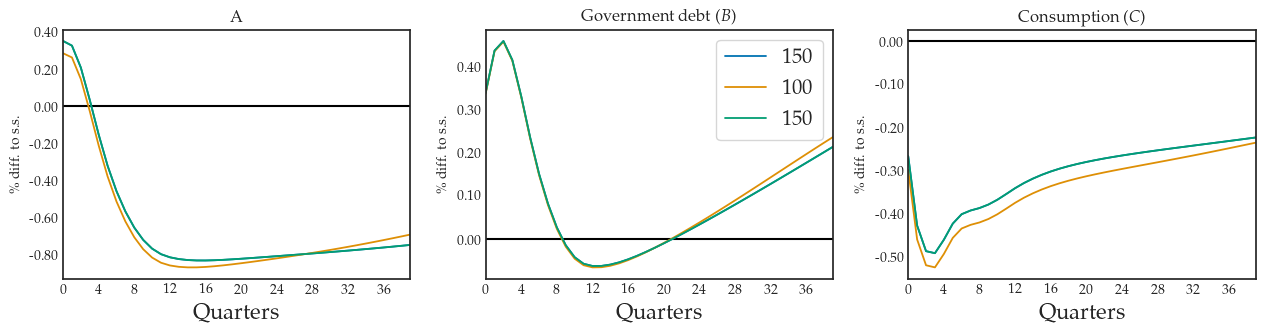

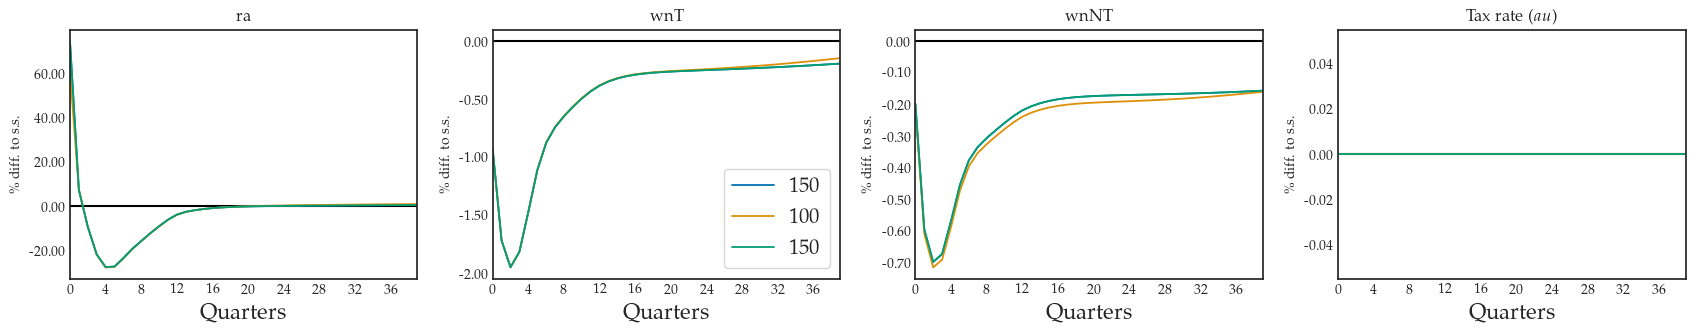

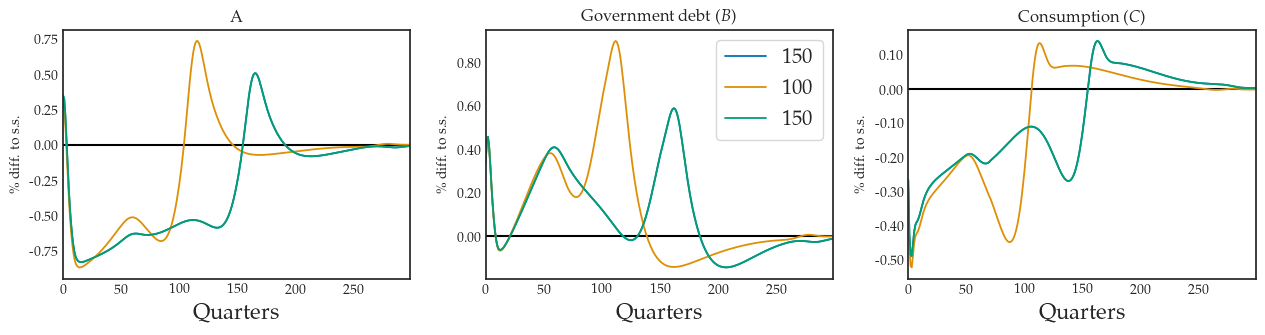

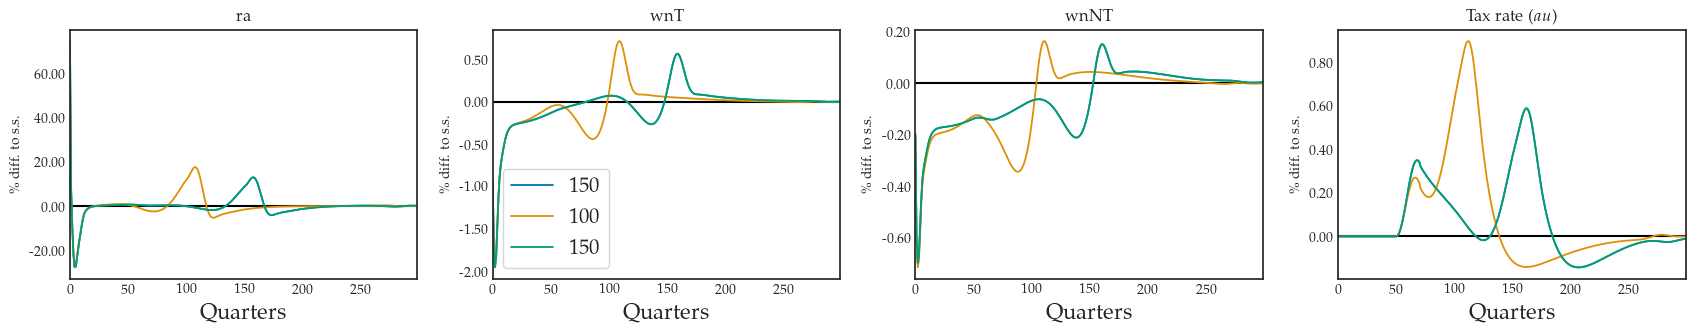

In [6]:
vary(model_HANK,'tauNFA',[100,150])

deltaNFA = 100.00


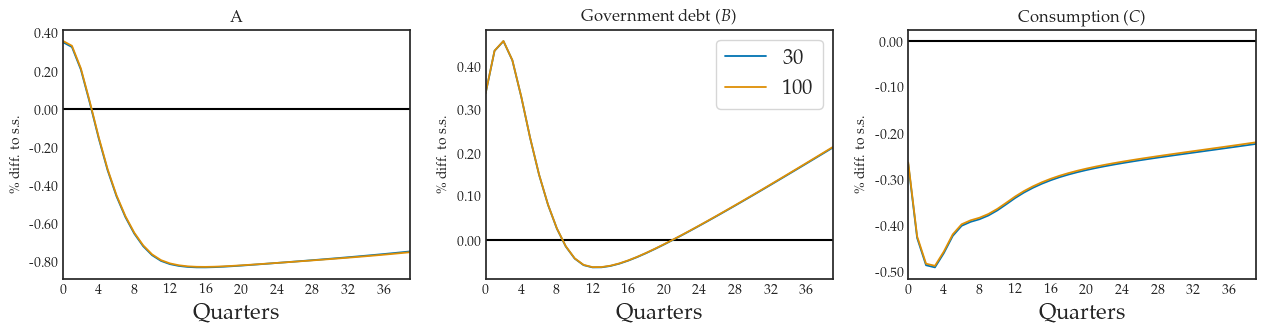

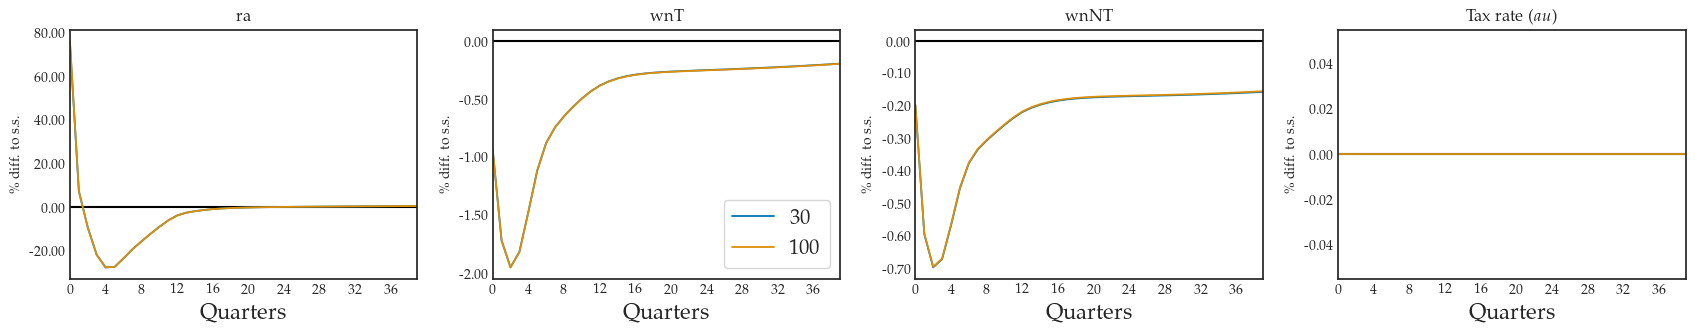

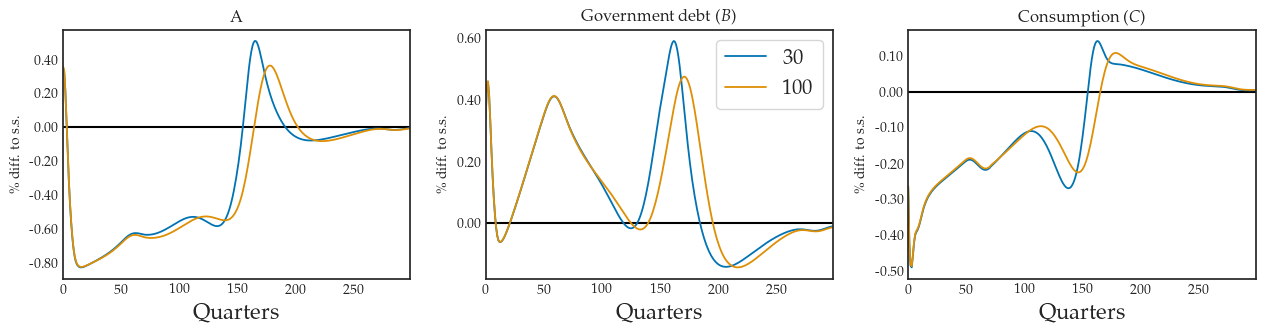

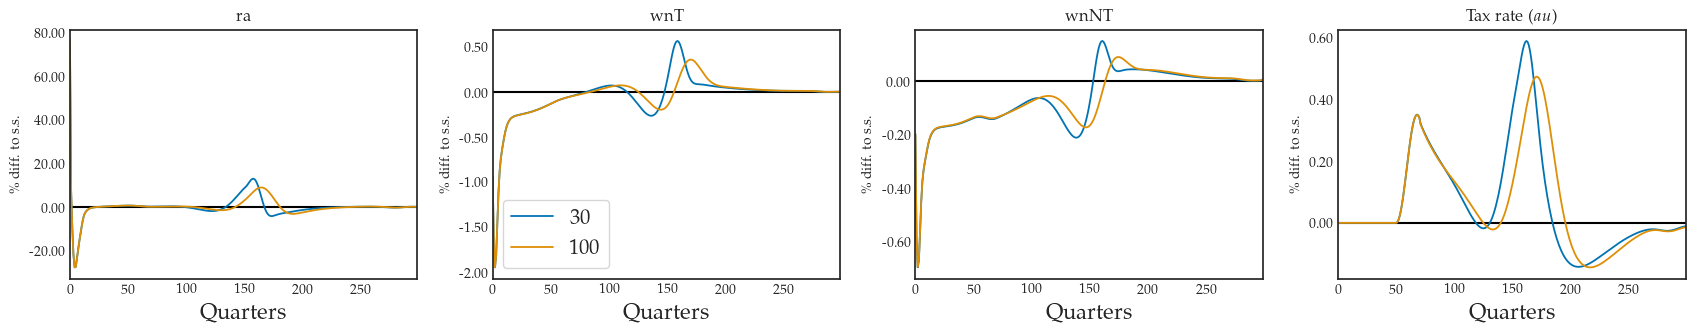

In [7]:
vary(model_HANK,'deltaNFA',[100])

epsNFA =  0.25


epsNFA =  0.10


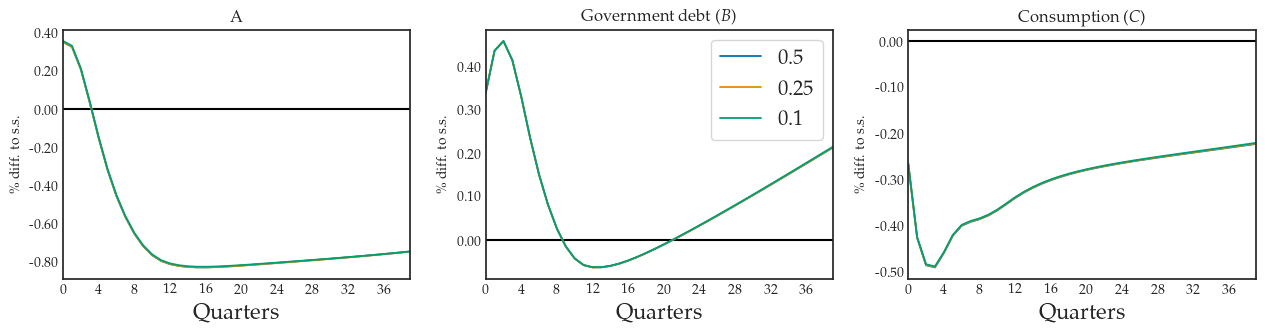

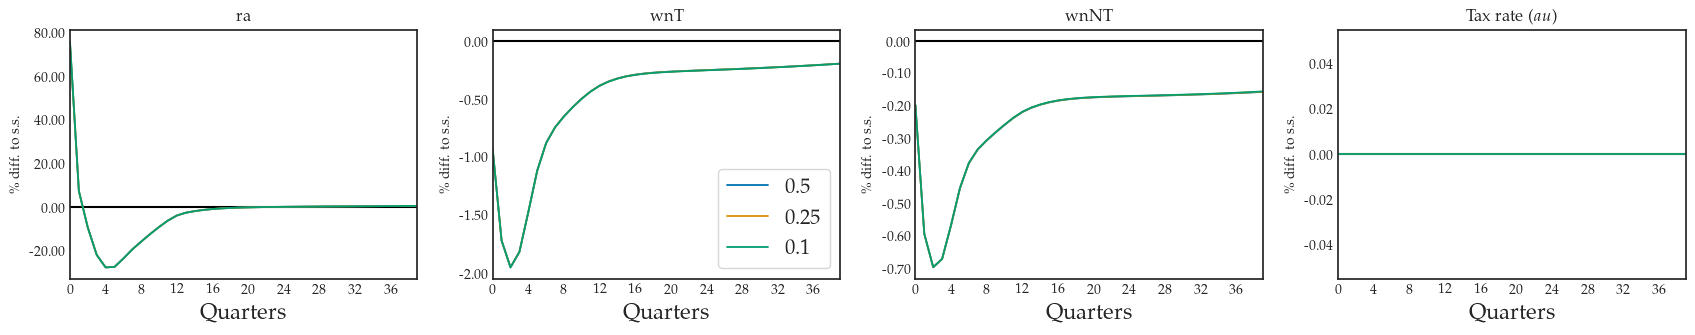

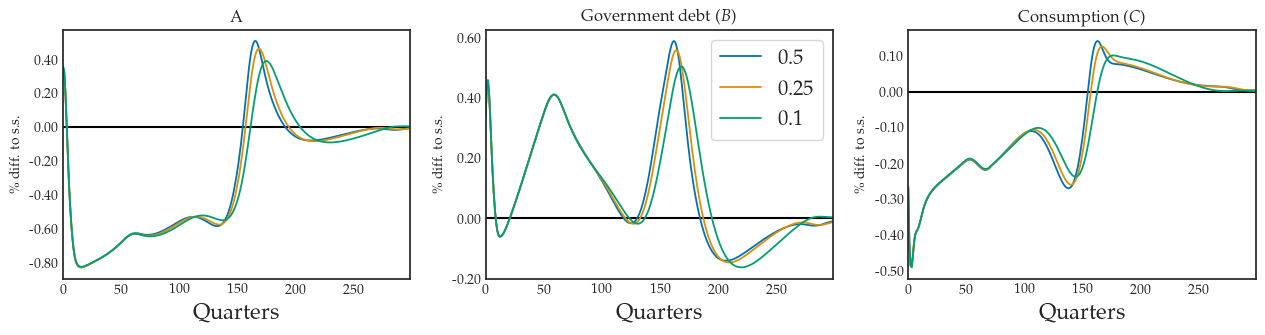

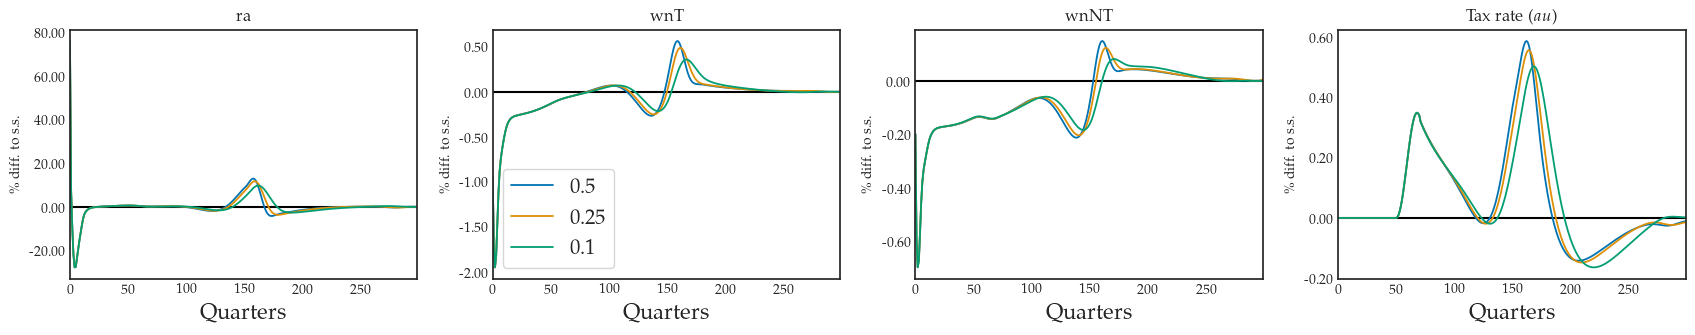

In [8]:
vary(model_HANK,'epsNFA',[0.25,0.10])

## 4. <a id='toc4_'></a>[NFA - RANK](#toc0_)

tauNFA = 100.00


tauNFA = 150.00


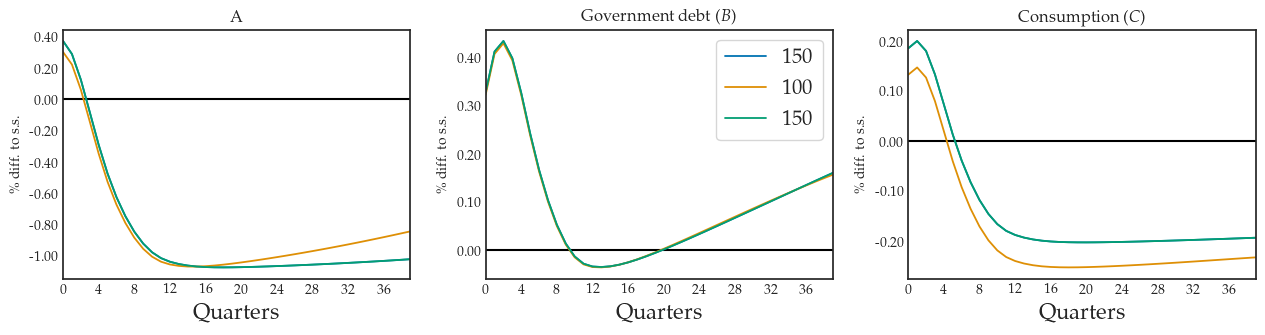

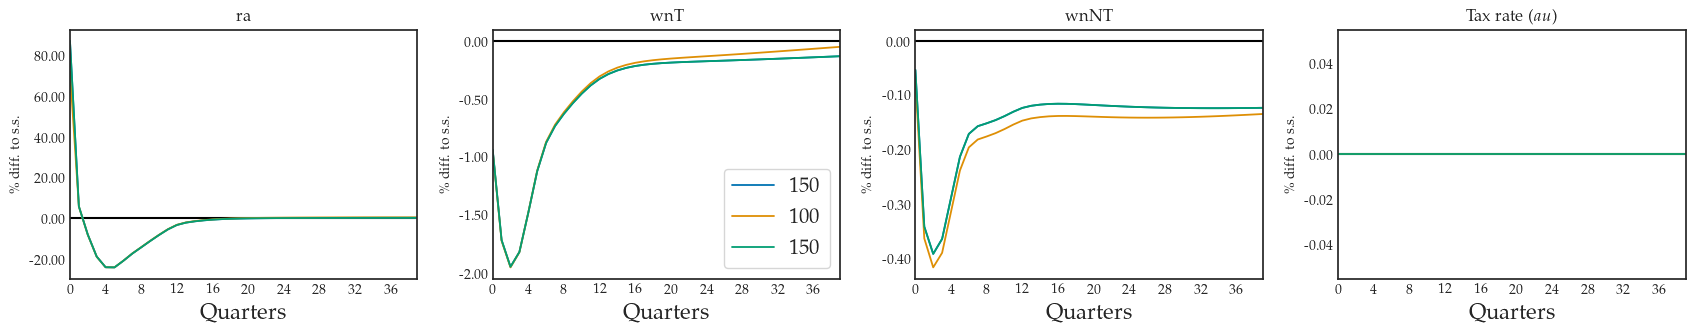

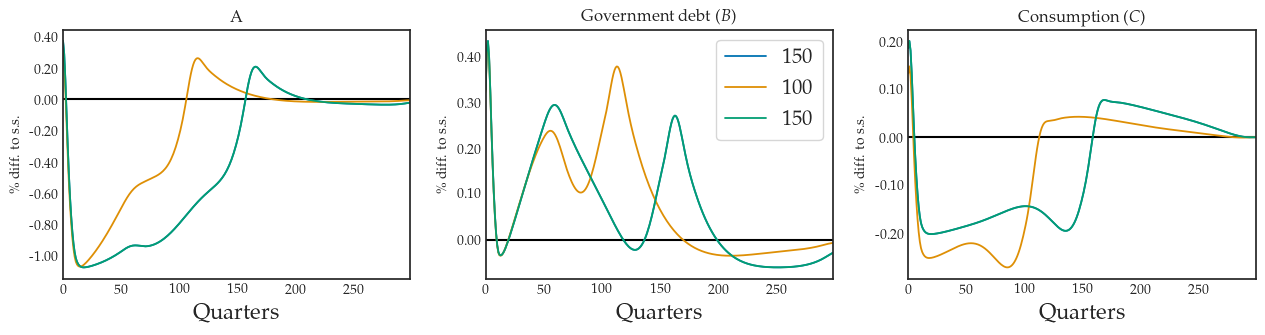

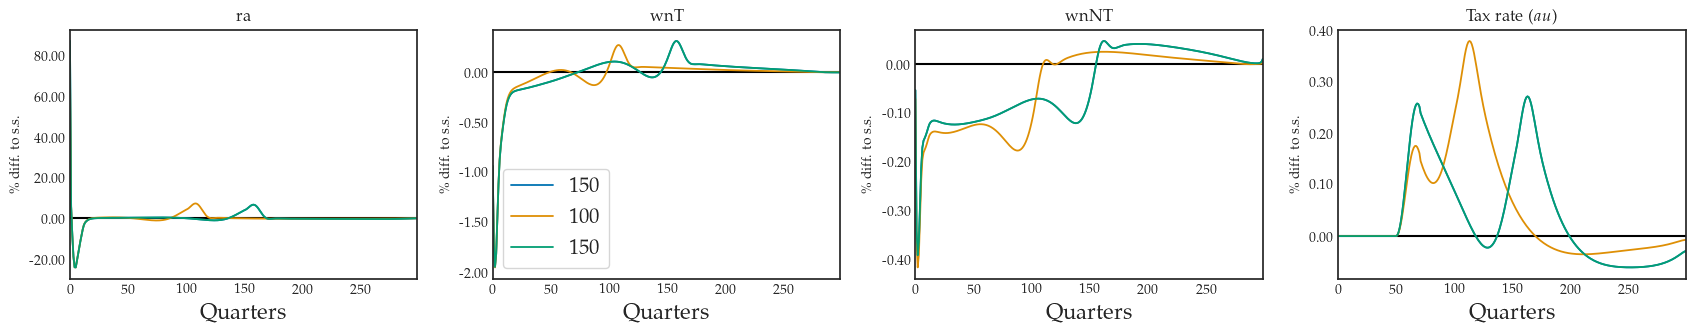

In [9]:
vary(model_RANK,'tauNFA',[100,150])

deltaNFA = 50.00


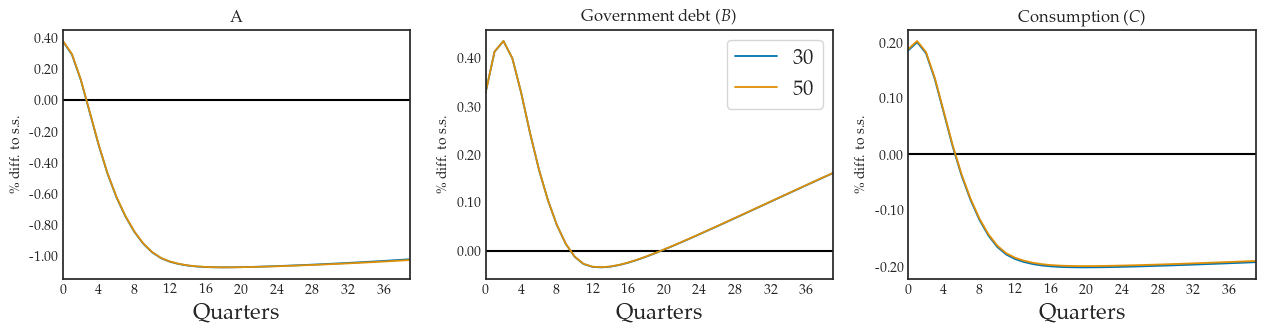

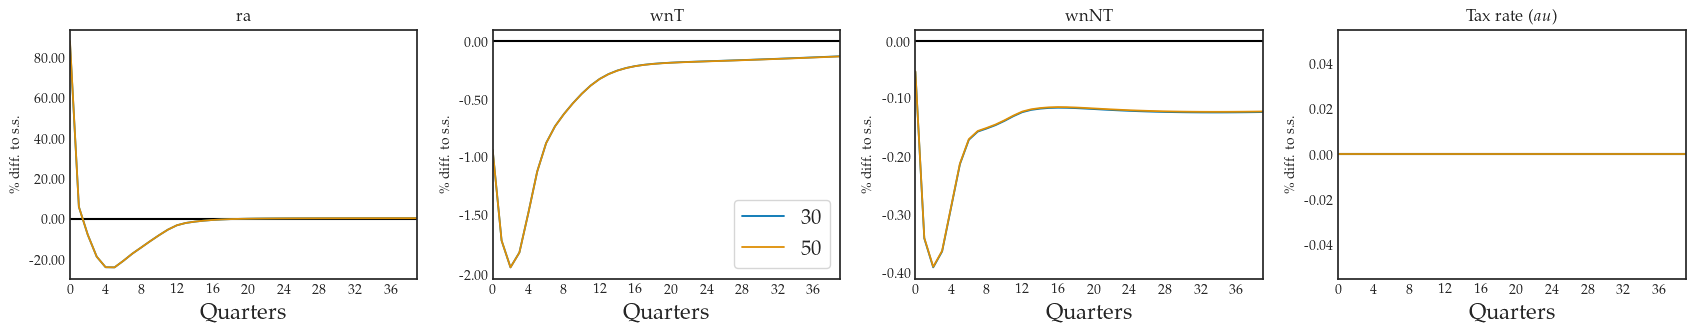

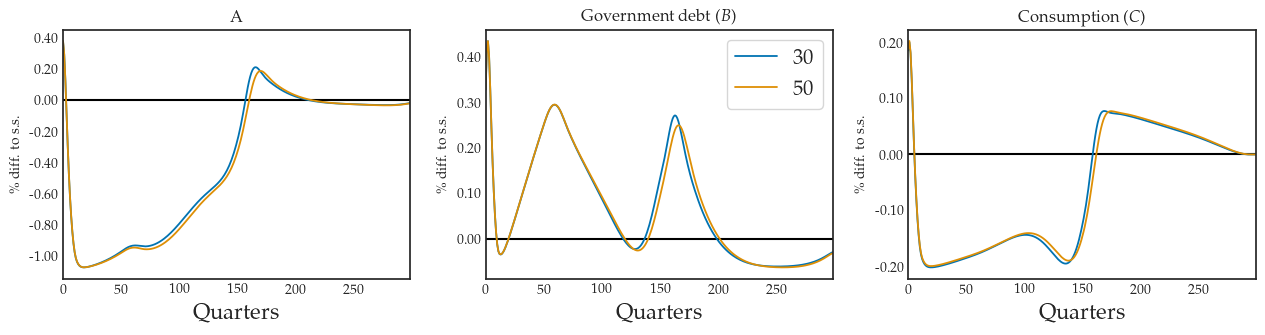

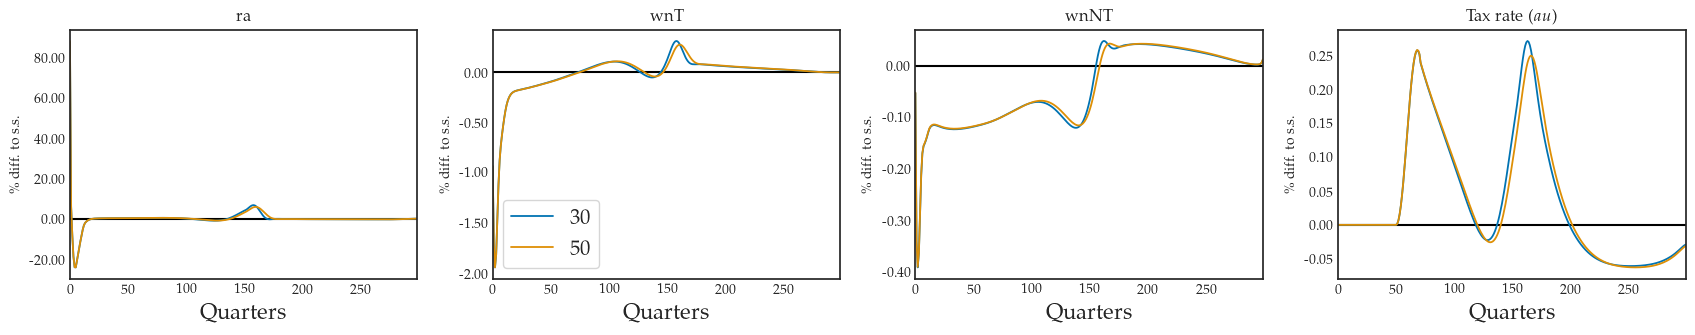

In [10]:
vary(model_RANK,'deltaNFA',[50])

epsNFA =  0.25


epsNFA =  0.10


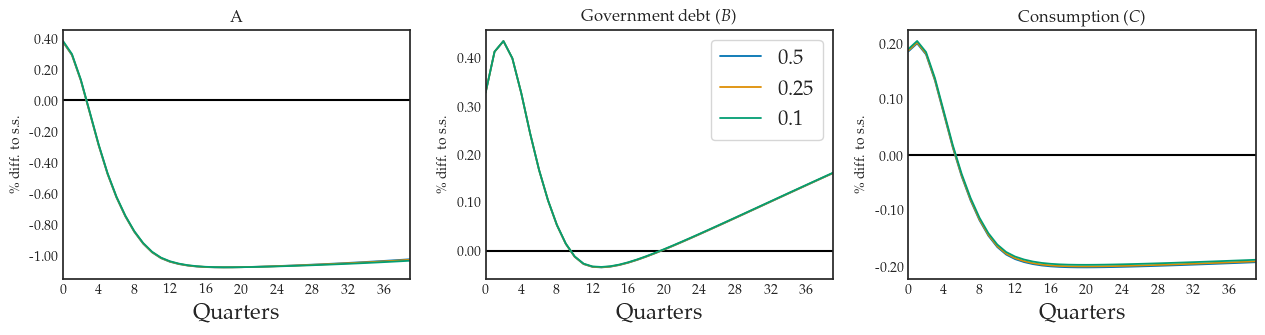

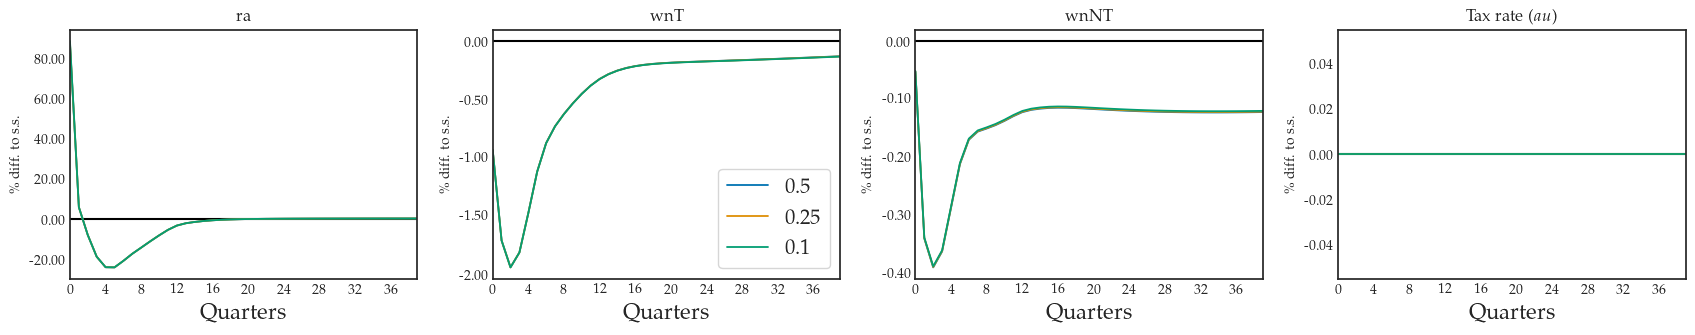

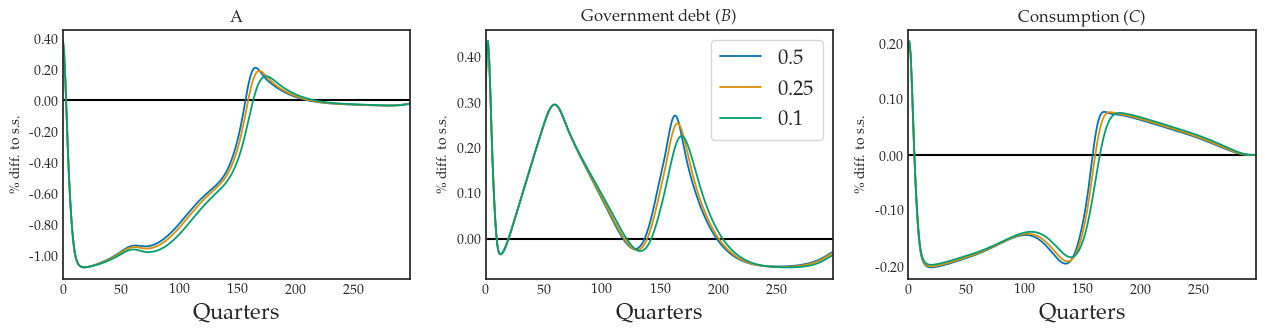

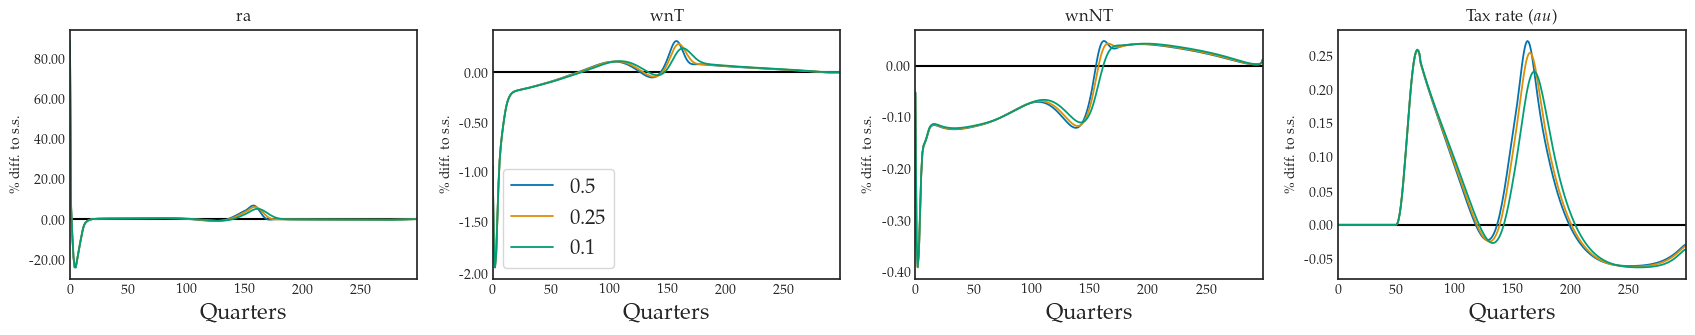

In [11]:
vary(model_RANK,'epsNFA',[0.25,0.10])

## 5. <a id='toc5_'></a>[Debt rule](#toc0_)

tauB = 25.00


tauB = 75.00


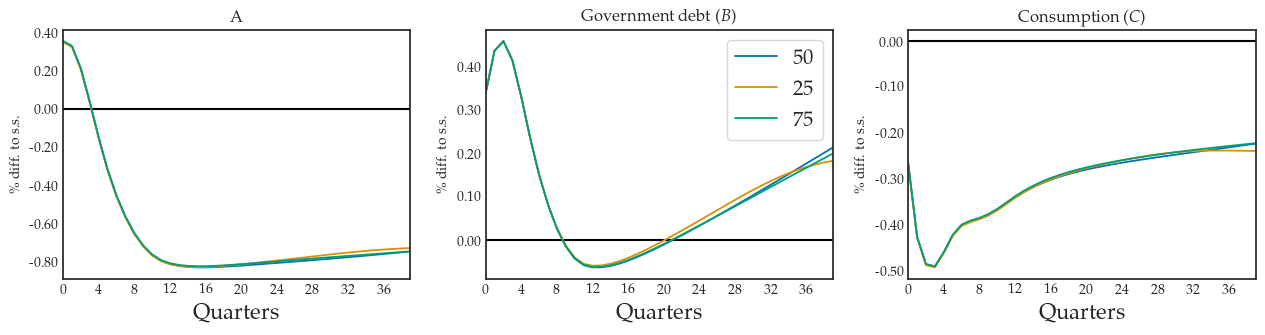

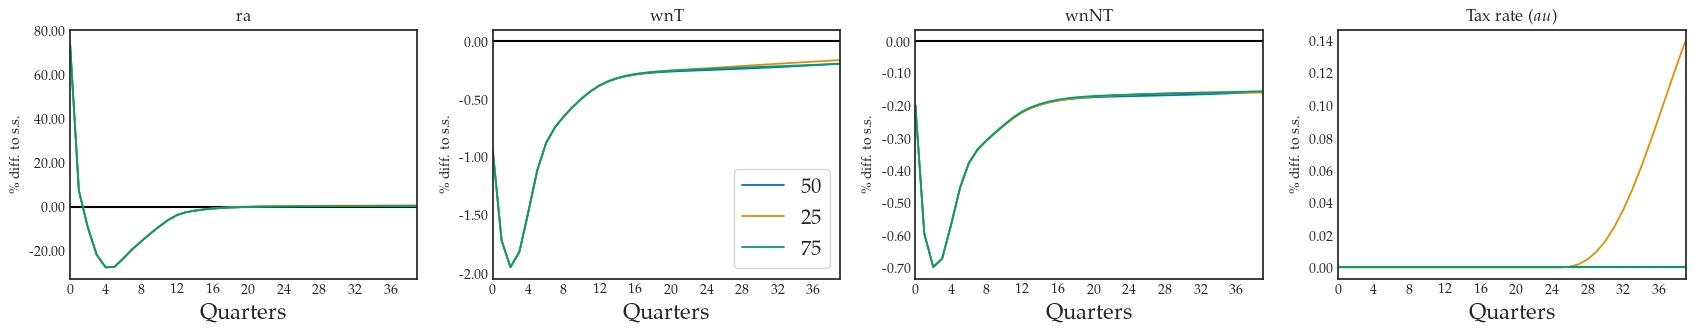

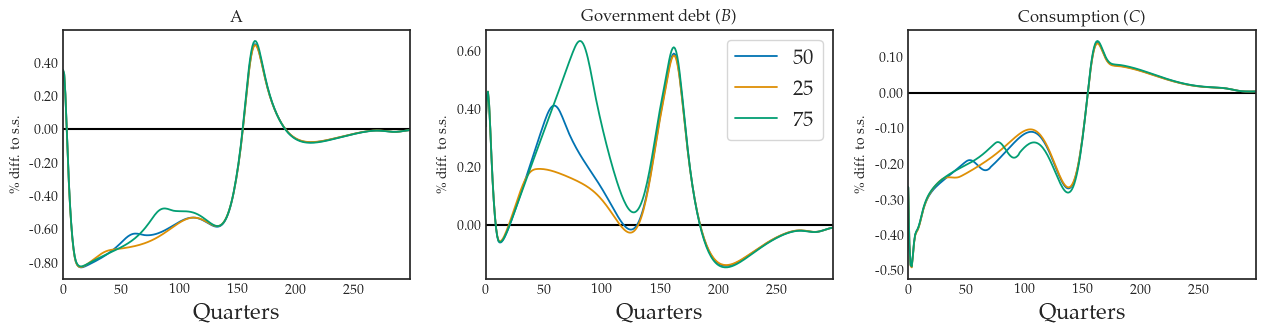

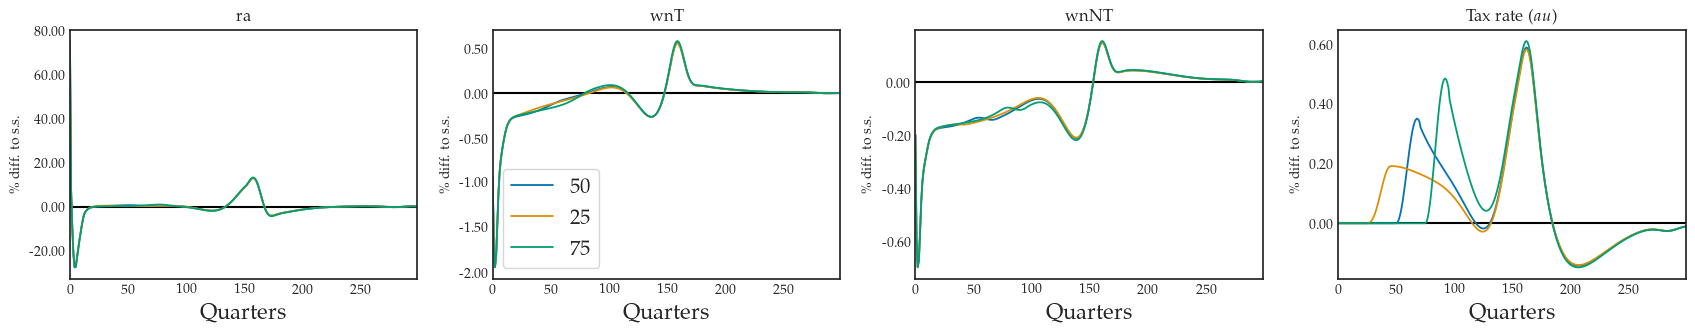

In [12]:
vary(model_HANK,'tauB',[25,75])

deltaB = 40.00


deltaB = 60.00


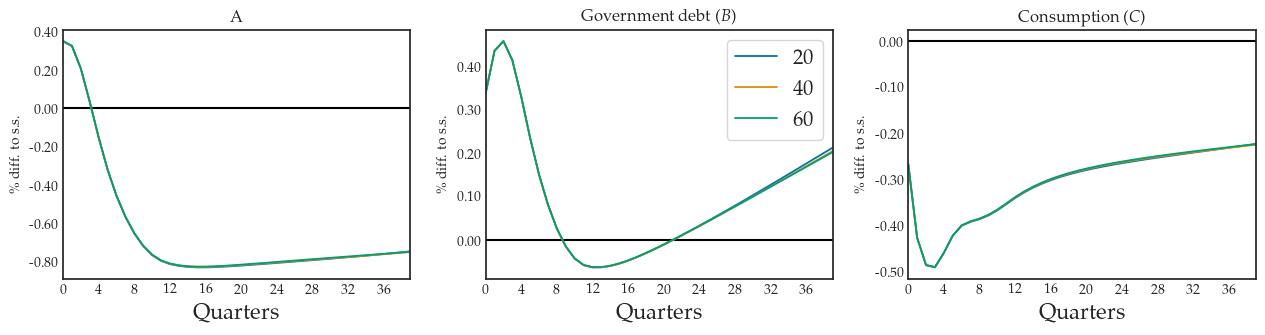

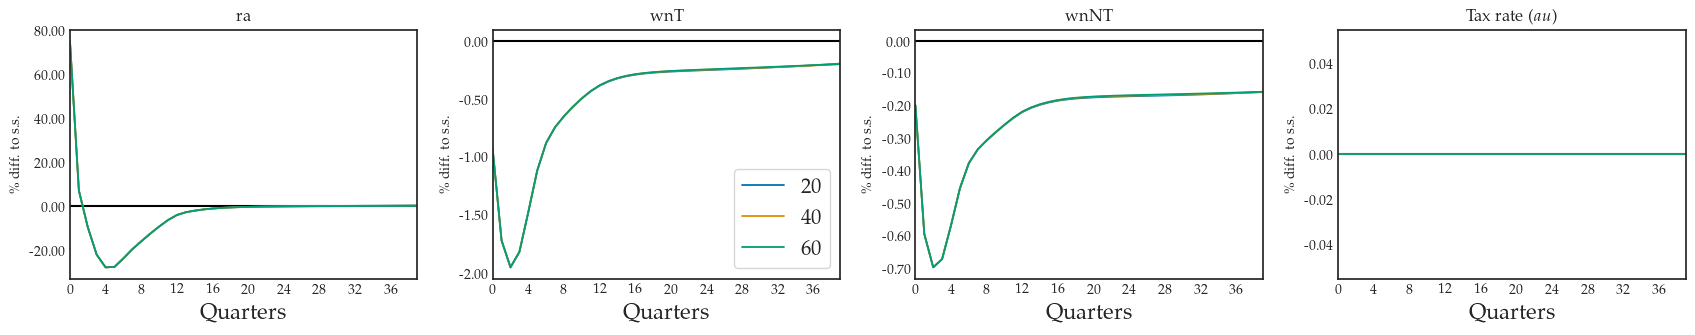

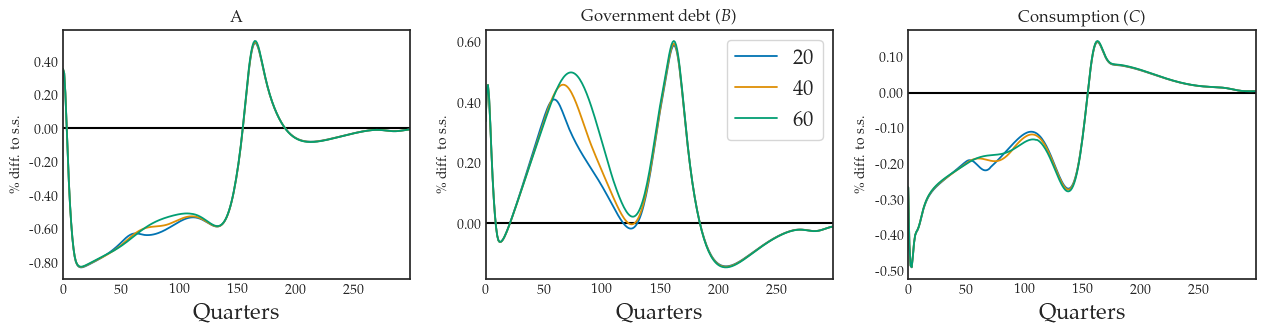

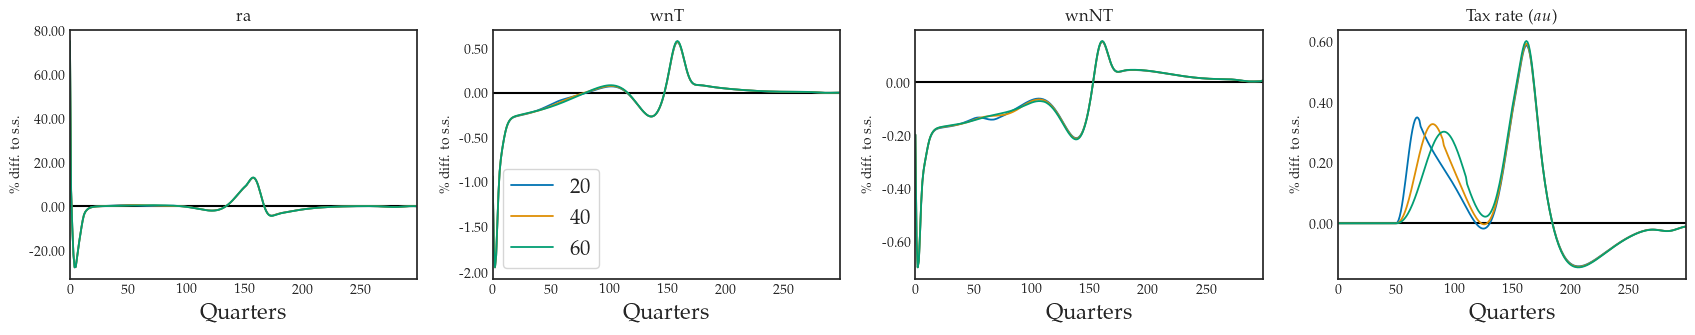

In [13]:
vary(model_HANK,'deltaB',[40,60])

epsB =  0.50


GEModelTools: No improvement for 5 iterations
epsB =  5.00


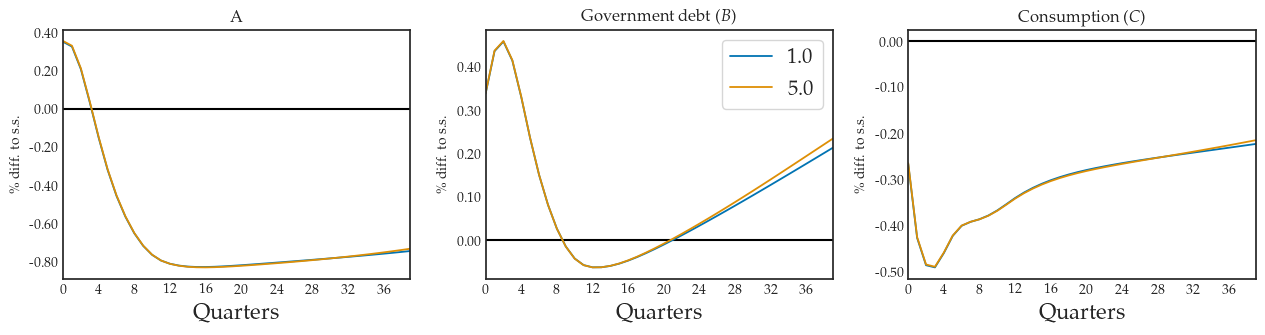

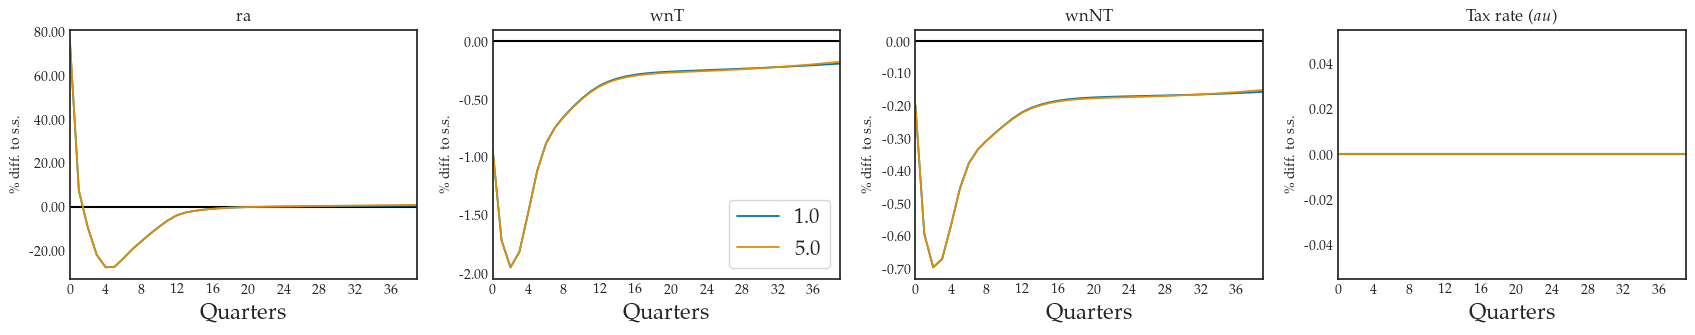

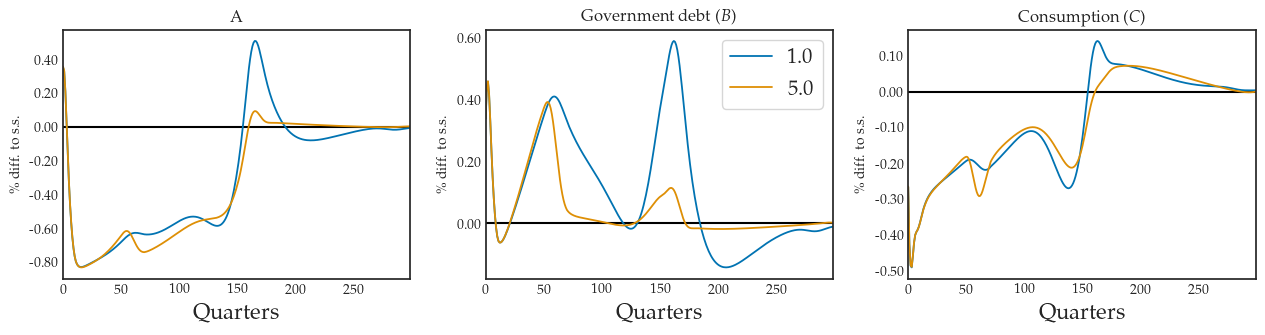

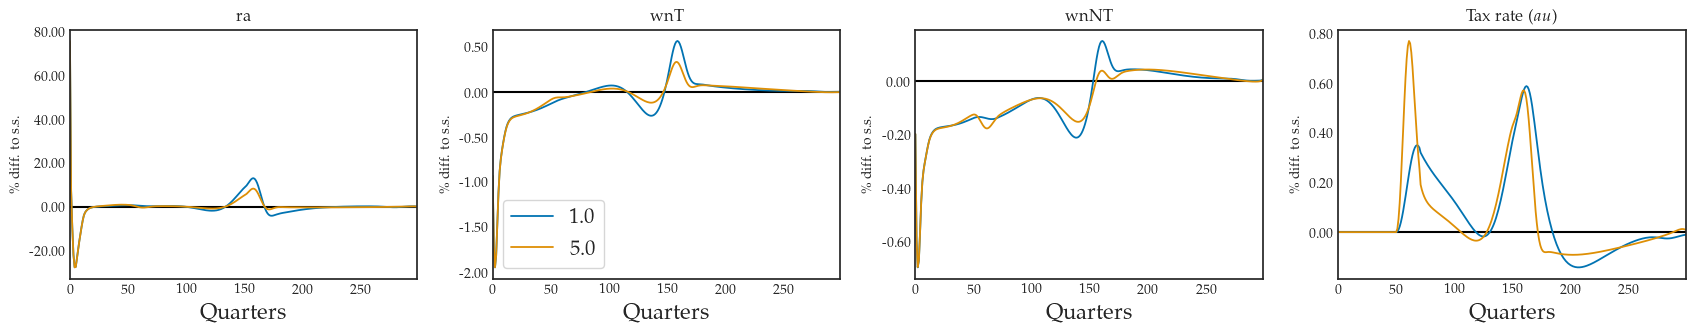

In [14]:
vary(model_HANK,'epsB',[0.5,5.0])

## 6. <a id='toc6_'></a>[Solution](#toc0_)

tol_broyden = 1.0e-08


tol_broyden = 1.0e-09


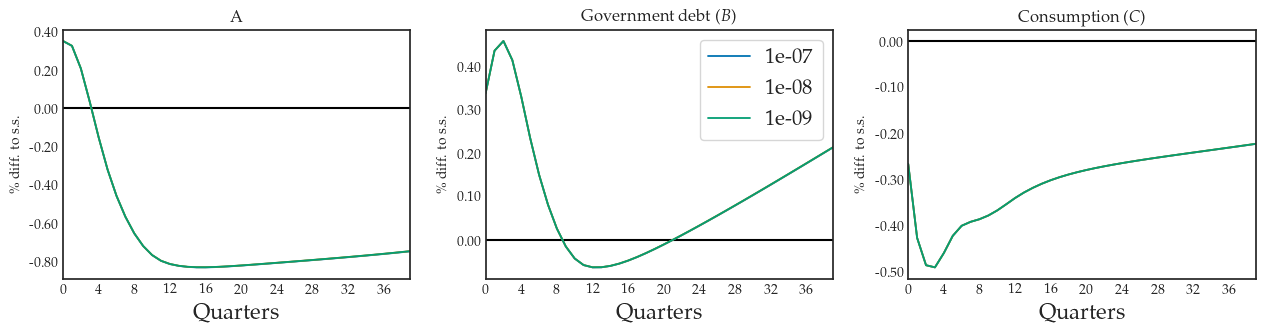

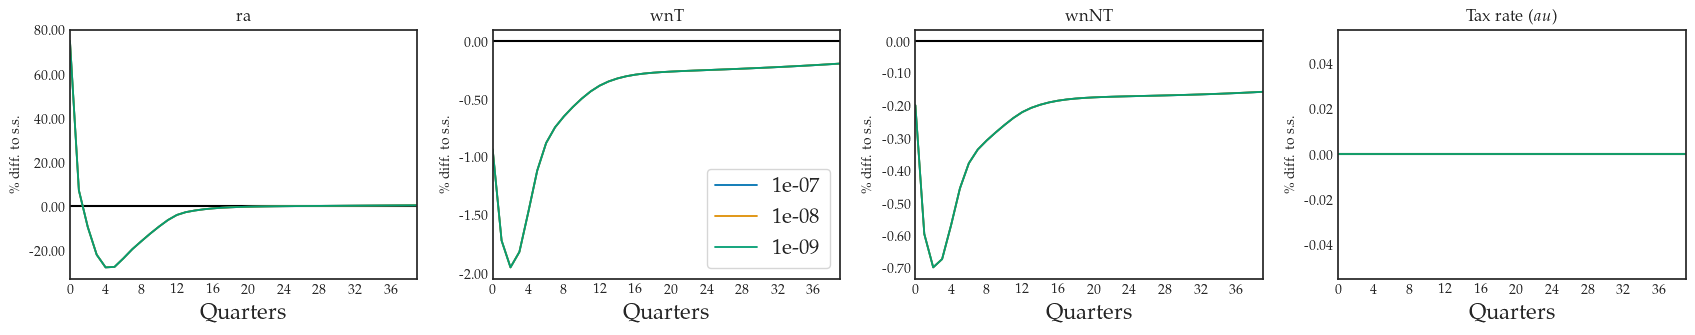

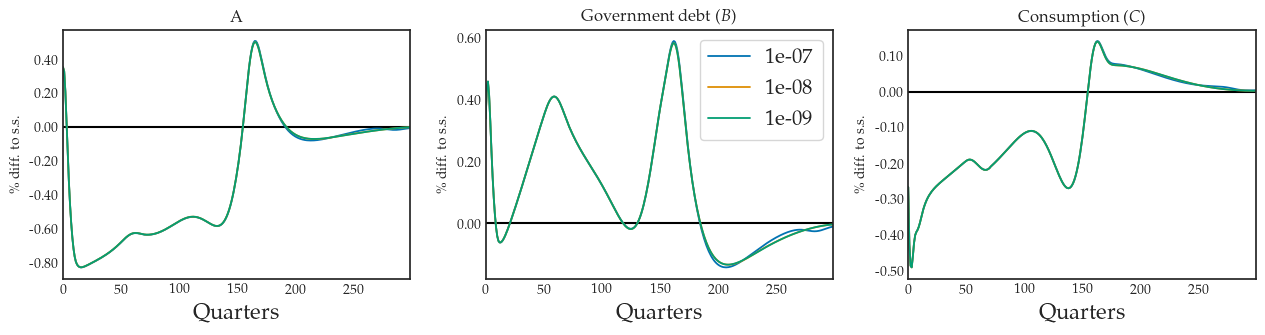

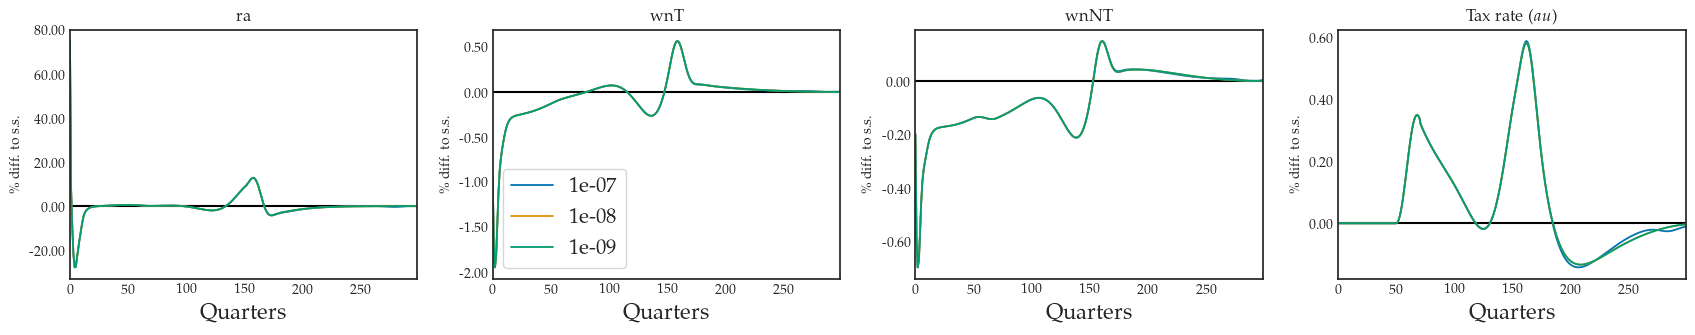

In [15]:
vary(model_HANK,'tol_broyden',[1e-8,1e-9])

scale = 10.00


scale =  1.00


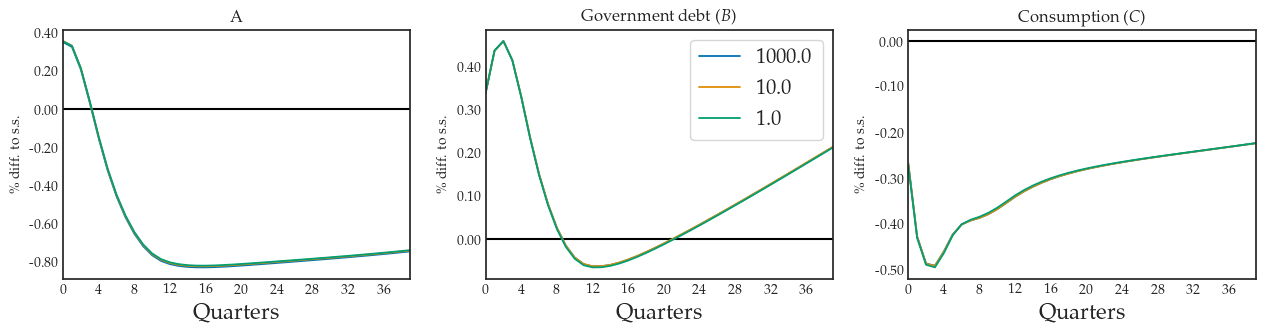

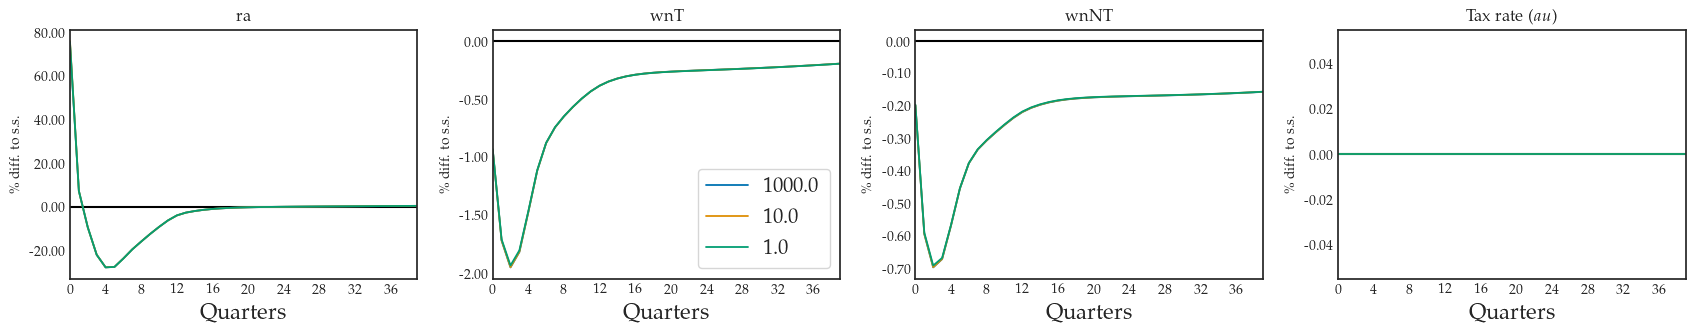

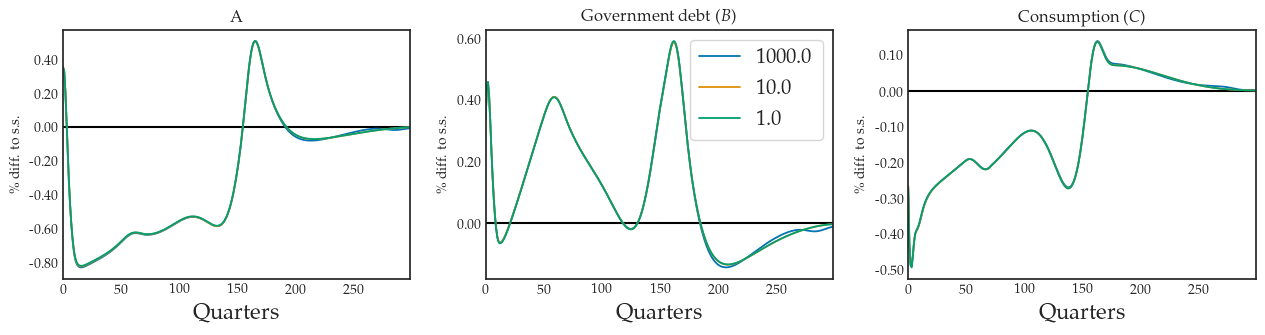

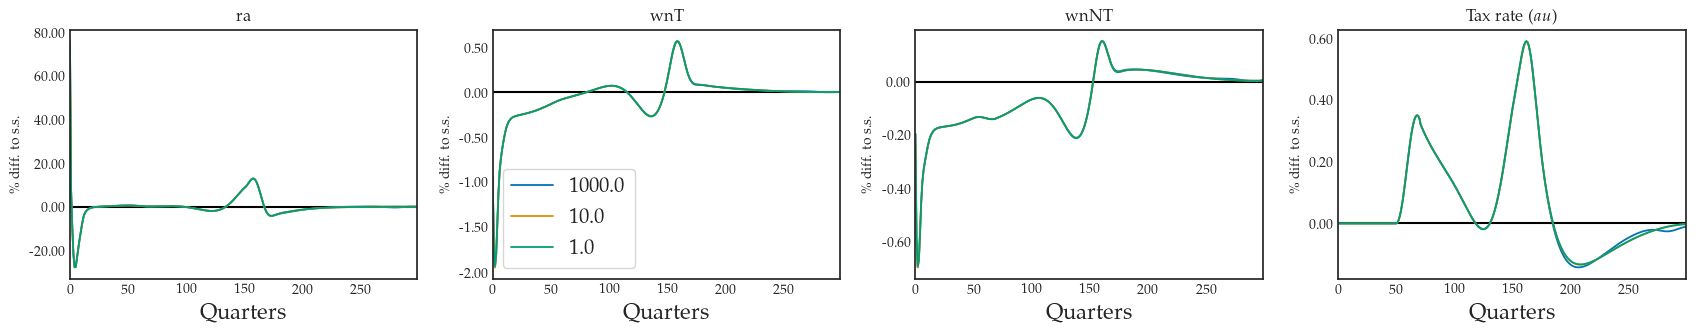

In [16]:
vary(model_HANK,'scale',[10.0,1.0])

T = 600.00
T_0


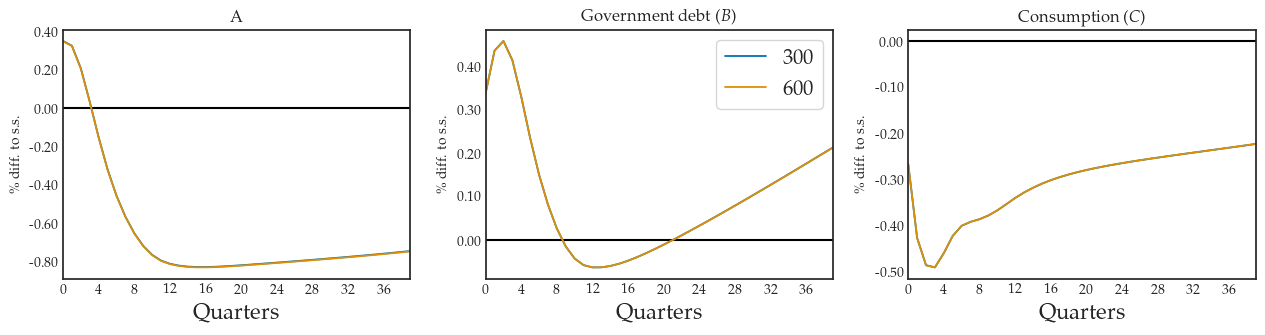

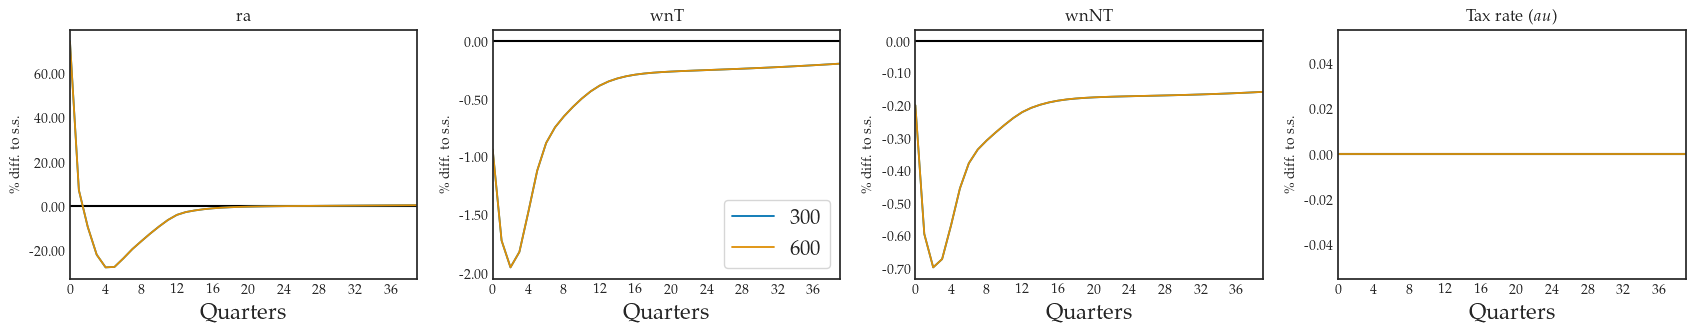

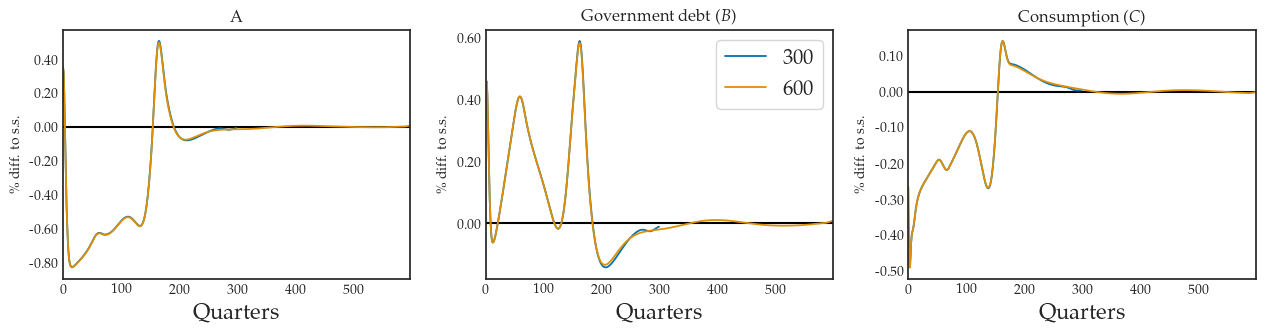

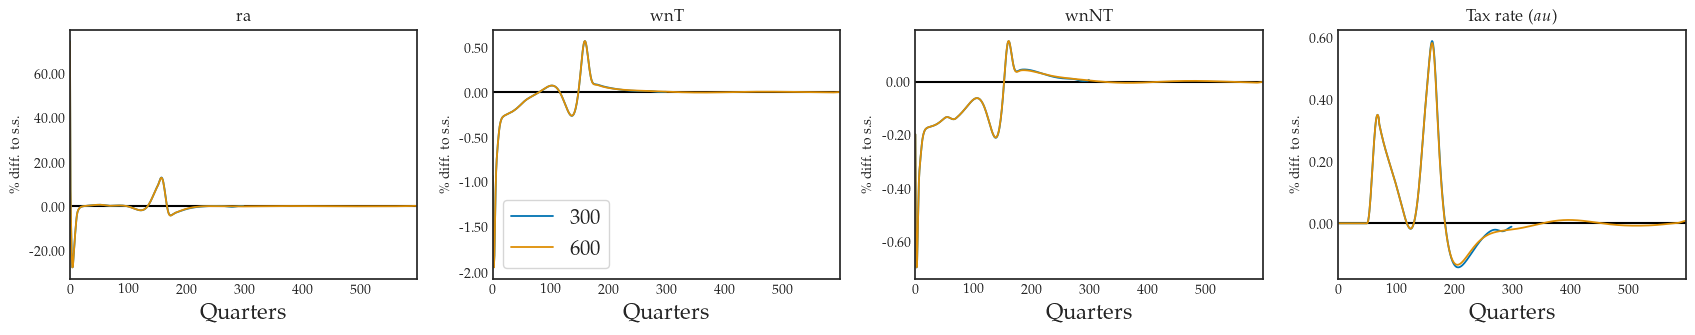

In [17]:
if DO_T: vary(model_HANK,'T',[600],do_create=True)